In [1]:
# import system libraries
import sys
import os
import glob

# import Data Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                        

%matplotlib inline

# Set paths for custom modules
sys.path.insert(0, './helpers')
sys.path.insert(0, './models')

# Image Loader functions
from image_loader import dir_loader_stack
from image_loader import csv_loader_stack
from image_loader import image_plot

# Model classes
from resnet50 import Resnet50_pretrained

# Model helpers
from model_helpers import train
from model_helpers import predict


# torch temp
import torch.nn as nn
import torch.optim as optim
import torch

### Data From CSV Example

In [2]:
# Labels from CSV

df_lab = pd.read_csv('../datasets/animals/labels.csv')
df_lab.head()


,FilePath,Label
0,cats/cats_00072.jpg,cat
1,cats/cats_00073.jpg,cat
2,cats/cats_00074.jpg,cat
3,cats/cats_00075.jpg,cat
4,cats/cats_00076.jpg,cat


In [16]:
df_lab.Label = pd.Categorical(pd.factorize(df_lab.Label)[0])

In [17]:
df_lab.head()

,FilePath,Label
0,cats/cats_00072.jpg,0
1,cats/cats_00073.jpg,0
2,cats/cats_00074.jpg,0
3,cats/cats_00075.jpg,0
4,cats/cats_00076.jpg,0


In [18]:
df_lab.tail()

,FilePath,Label
2845,panda/panda_00996.jpg,2
2846,panda/panda_00997.jpg,2
2847,panda/panda_00998.jpg,2
2848,panda/panda_00999.jpg,2
2849,panda/panda_01000.jpg,2


In [19]:
df_lab.shape

(2850, 2)

In [20]:
# params

img_size = 244
batch_size = 32
num_workers = 0

# Dataset folder
data_dir = '../datasets/animals/'

# # Set subfolders for train, val & test
# train_dir = os.path.join(data_dir, 'train/')
# val_dir = os.path.join(data_dir, 'valid/')
# test_dir = os.path.join(data_dir, 'test/')

In [21]:
# train test split
# Train & val


In [22]:
train_loader = csv_loader_stack(data_dir,df_lab, 'FilePath', 'Label',
                        img_size,batch_size,num_workers,True)

val_loader = csv_loader_stack(data_dir,df_lab, 'FilePath', 'Label',
                        img_size,batch_size,num_workers,False)

# test_loader = NEED HOLDOUT SET


loaders = {
    'train':train_loader,
    'valid':val_loader,
    #'test':test_loader,
}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0)


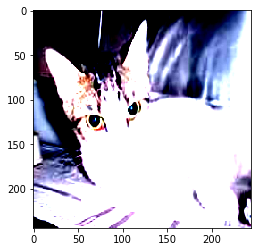

In [37]:
images, labels = next(iter(train_loader))

# Display image and label
plt.imshow(images[0].permute(1, 2, 0))
print(labels[0])

In [38]:
# image_plot(train_loader)

### Create Model

In [39]:
# Model Parms
num_classes = 3
device = 'cuda'

In [40]:
# create model from object

In [41]:
res_model = Resnet50_pretrained(num_classes)

In [42]:
res_model = res_model.build()

In [45]:

# for batch_idx, (data, target) in enumerate(loaders['train']):
#             # move to device
#             data = data.to(device)
            
#             target = torch.from_numpy(np.array(target))
#             target = target.to(device)

### Train Model

In [46]:
# Train Params
n_epochs = 1
learn_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(res_model.fc.parameters(), lr=learn_rate)

device = 'cuda'
save_path = 'test_train.pt'

In [47]:
train(res_model, n_epochs, loaders, optimizer,
                    criterion, device, save_path)

NameError: name 'F' is not defined

In [ ]:
# 

### Save Model

In [ ]:
# TODO Create model method

### Load Model


In [ ]:
# TODO Create model method

# res_model.load()

### Train Logs

In [ ]:
### TODO make log function 

### Test Model

In [ ]:
# get images image folder
images = glob.glob("images/*")

In [ ]:
for image in images:
    predict(res_model,image,device)